In [1]:
import pandas as pd

In [2]:
cctv_seoul= pd.read_csv('./data/cctv_in_seoul.csv', encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### cctv_seoul 컬럼목록

In [3]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

### 0번째 컬럼이름 바꾸기: '기관명'->'구별'

rename을 했더라도 원래 데이터파일에서는 '기관명'으로 그대로 보존하고 있다. 

In [4]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'}, inplace=True)
cctv_seoul.head() # 컬럼포함 5개 데이터 포인트를 읽는다.

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
pop_seoul= pd.read_excel('./data/population_seoul.xls', encoding='utf-8')
pop_seoul.head() # 컬럼포함 5개 데이터 포인트를 읽는다.

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.1/4,합계,4290922,10054979,4909387,5145592,9770216,4772134,4998082,284763,137253,147510,2.28,1436125
3,2019.1/4,종로구,73914,162913,78963,83950,152778,74536,78242,10135,4427,5708,2.07,26981
4,2019.1/4,중구,61800,135836,66720,69116,125942,61992,63950,9894,4728,5166,2.04,22421


그러나 0번째와 1번째는 컬럼과 중복되어있으므로 

2번째 데이터 포인트(행)은 전체구의 합계이기 때문에 제외한다.

3번째 데이터 포인터부터가 인구에 관한 데이터이다.

In [6]:
pop_seoul=pd.read_excel('./data/population_seoul.xls', 
                        header=3, #header: 시작 인덱스:3
                        usecols='B,D,G,J,N', # 지역이름(B), 합계에 해당하는 컬럼만 사용
                        encoding='utf-8'
                       )

pop_seoul.head()

,합계,10054979,9770216,284763,1436125
0,종로구,162913,152778,10135,26981
1,중구,135836,125942,9894,22421
2,용산구,245139,229168,15971,38049
3,성동구,314608,306404,8204,43076
4,광진구,370658,354873,15785,46288


컬럼의 이름을 정리한다.

자치구(B) => 구별

계(D)=> 인구수

계.1(G)=> 한국인

계.2(J)=> 외국인

65세이상고령자(N) => 고령자

In [7]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                         pop_seoul.columns[1]:'인구수',
                         pop_seoul.columns[2]:'한국인',
                         pop_seoul.columns[3]:'외국인',
                         pop_seoul.columns[4]:'고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,종로구,162913,152778,10135,26981
1,중구,135836,125942,9894,22421
2,용산구,245139,229168,15971,38049
3,성동구,314608,306404,8204,43076
4,광진구,370658,354873,15785,46288


### pandas 이용해서 cctv와 현황 데이터 파악하기

In [8]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613




#### pd methods: sort_values() 
'소계' 컬럼을 기준으로 cctv_seoul을 오름차순으로 정렬

In [9]:
cctv_seoul.sort_values(by=cctv_seoul.columns[1], ascending=True)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [10]:
cctv_seoul.sort_values(by=cctv_seoul.columns[1], ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630



소계 컬럼에 따르면 
cctv는 강남구, 양천구, 서초구, 관악구, 은평구 순으로 가장 많다.



In [11]:
cctv_seoul['최근 증가율']=(cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년'])/ cctv_seoul['2013년도 이전'] *100
cctv_seoul.sort_values(by='최근 증가율', ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


최근 증가율 컬럼은 새로 만든 컬럼이며

(2016년도 + 2015년도 + 2014년도 )/ (2013년도이전) *100 으로 유도된 컬럼이다.

최근 증가율 컬럼을 기준으로 정렬한 결과

종로구, 도봉구, 마포구, 노원구, '강동구' 순으로 cctv 설치가 많이 증가했다. 


### pandas를 이용하여 서울인구(pop_seoul) 데이터 분석

#### pop_seoul 데이터의 '구별'컬럼의 unique를 조사

unique조사
: 반복된 데이터를 하나로 나타냄. 
    
한번 이상 나온 데이터를 확인

In [12]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

#### isnull(): null(NaN) 가 어디에 있는지 확인하기 위해서 사용

In [13]:
pop_seoul[pop_seoul['구별'].isnull()] #NaN이 존재하지 않음.

,구별,인구수,한국인,외국인,고령자


### 외국인 비율과 고령자 비율 계산

In [14]:
pop_seoul['외국인 비율']=pop_seoul['외국인']/pop_seoul['인구수'] *100
pop_seoul['고령자 비율']=pop_seoul['고령자']/pop_seoul['인구수'] *100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,162913,152778,10135,26981,6.221112,16.561600
1,중구,135836,125942,9894,22421,7.283783,16.505934
2,용산구,245139,229168,15971,38049,6.515079,15.521398
3,성동구,314608,306404,8204,43076,2.607690,13.691960
4,광진구,370658,354873,15785,46288,4.258643,12.488062


#### '외국인' 컬럼에 따라 정렬

In [16]:
pop_seoul.sort_values(by='외국인', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
18,영등포구,404556,368824,35732,56463,8.832399,13.956782
16,구로구,438889,404726,34163,63017,7.783973,14.358300
17,금천구,254244,233981,20263,36301,7.969903,14.278016
20,관악구,520645,502615,18030,73005,3.463012,14.022030
5,동대문구,363262,346750,16512,57570,4.545480,15.848066
2,용산구,245139,229168,15971,38049,6.515079,15.521398
4,광진구,370658,354873,15785,46288,4.258643,12.488062
19,동작구,412031,398886,13145,60462,3.190294,14.674139
12,서대문구,324604,311771,12833,51085,3.953432,15.737637
7,성북구,450021,438245,11776,68612,2.616767,15.246400


'외국인' 컬럼을 기준으로 내림차순 정렬로 했을 때

영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 외국인수가 크다.

그렇다고 '외국인 비율'은 '외국인 수'와 비례하지는 않는다.

#### '외국인 비율' 컬럼에 따라 정렬

In [20]:
pop_seoul.sort_values(by='외국인 비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
18,영등포구,404556,368824,35732,56463,8.832399,13.956782
17,금천구,254244,233981,20263,36301,7.969903,14.278016
16,구로구,438889,404726,34163,63017,7.783973,14.358300
1,중구,135836,125942,9894,22421,7.283783,16.505934
2,용산구,245139,229168,15971,38049,6.515079,15.521398
0,종로구,162913,152778,10135,26981,6.221112,16.561600
5,동대문구,363262,346750,16512,57570,4.545480,15.848066
4,광진구,370658,354873,15785,46288,4.258643,12.488062
12,서대문구,324604,311771,12833,51085,3.953432,15.737637
20,관악구,520645,502615,18030,73005,3.463012,14.022030


구별로 (외국인 수)/(인구수) *100 으로 얻은 결과값인 외국인 비율 에서

영등포구, 금천구, 구로구, 중구, 용산구 순으로 외국인 비율이 높다.

영등포구는 외국인 수와 외국인 비율이 모두 높은 편이다.

그러나 외국인 수는 높은데 

외국인 비율은 (외국인 수가 낮은)다른 지역보다 낮은 곳도 있다.

#### '고령자' 컬럼에 따라 정렬

In [17]:
pop_seoul.sort_values(by='고령자', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
23,송파구,685361,678521,6840,83492,0.998014,12.182193
15,강서구,602886,596287,6599,80903,1.094568,13.419287
11,은평구,488713,484274,4439,78406,0.908304,16.043363
10,노원구,545486,541174,4312,78170,0.790488,14.330340
20,관악구,520645,502615,18030,73005,3.463012,14.022030
7,성북구,450021,438245,11776,68612,2.616767,15.246400
22,강남구,546875,541854,5021,68104,0.918126,12.453303
16,구로구,438889,404726,34163,63017,7.783973,14.358300
6,중랑구,407211,402203,5008,62789,1.229829,15.419279
19,동작구,412031,398886,13145,60462,3.190294,14.674139


고령자 컬럼을 기준으로 내림차순 나열을 했을 때

송파구, 강서구, 은평구, 노원구, 관악구 순으로 고령자 수가 높다.

#### '고령자 비율' 에 따라 정렬

In [22]:
pop_seoul.sort_values(by='고령자 비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
8,강북구,321151,317386,3765,58858,1.172346,18.327204
9,도봉구,340089,337820,2269,56742,0.667178,16.684456
0,종로구,162913,152778,10135,26981,6.221112,16.561600
1,중구,135836,125942,9894,22421,7.283783,16.505934
11,은평구,488713,484274,4439,78406,0.908304,16.043363
5,동대문구,363262,346750,16512,57570,4.545480,15.848066
12,서대문구,324604,311771,12833,51085,3.953432,15.737637
2,용산구,245139,229168,15971,38049,6.515079,15.521398
6,중랑구,407211,402203,5008,62789,1.229829,15.419279
7,성북구,450021,438245,11776,68612,2.616767,15.246400


(고령자수)/(인구수) *100 을 유도해서 얻은 결과인 고령자 비율은

강북구, 도봉구, 종로구, 중구, 은평구 순으로 가장 높다.

## cctv 데이터와 인구현황 데이터를 합치고 분석하기

In [23]:
data_result= pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,379,99,155,377,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,369,120,138,204,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,388,258,184,81,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,846,260,390,613,149.290780,520645,502615,18030,73005,3.463012,14.022030


의미없는 컬럼을 지운다.

행방향으로 삭제하는 것은 **drop**

열방향으로 삭제하는 것은 **del** 이다.

In [24]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


'구별' 컬럼을 index로 한다.

특정 컬럼을 index로 변환하는 함수 : set_index(컬럼이름)

In [25]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030



## 상관계수 조사

목적: '고령자비율', '외국인비율', '인구수' 중에서 'cctv'와 비교할지를 정한다.

상관계수의 절댓값이 클수록 두 데이터는 관계가 있다.

```
 상관계수의 절대값<= 0.1 : 두 데이터 관계는 거의 무시(상관없음)

 0.1<상관계수의 절대값<=0.3 : 두 데이터의 관계는 약한관계

 0.3<상관계수의 절대값<=0.7 : 뚜렷한 상관관계

 0.7<상관계수의 절대값      : 강한 상관관계
```

다수의 데이터 중 상관계수가 가장 큰값인 데이터를 비교.

상관계수를 계산하는 방법: np.corrcoef

In [27]:
import numpy as np

In [28]:
np.corrcoef(data_result['고령자 비율'], data_result['소계'])

array([[ 1.        , -0.28134716],
       [-0.28134716,  1.        ]])

cctv개수(소계)와 고령자비율은 약한 음의 상관관계

In [29]:
np.corrcoef(data_result['외국인 비율'], data_result['소계'])

array([[ 1.        , -0.05210682],
       [-0.05210682,  1.        ]])

cctv개수(소계)와 외국인비율은 관계없음.

In [30]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.21773943],
       [0.21773943, 1.        ]])

cctv개수(소계)와 인구수는 양의 상관관계(비례)

cctv개수와 인구수의 관계에 대해서 좀 더 조사

In [32]:
data_result.sort_values(by='소계', ascending=False )

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
양천구,2482,34.671731,466622,462599,4023,58930,0.862154,12.629066
서초구,2297,63.371266,437007,432762,4245,55366,0.971380,12.669362
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030
은평구,2108,85.237258,488713,484274,4439,78406,0.908304,16.043363
용산구,2096,53.216374,245139,229168,15971,38049,6.515079,15.521398
구로구,1884,64.973730,438889,404726,34163,63017,7.783973,14.358300
동대문구,1870,74.766355,363262,346750,16512,57570,4.545480,15.848066
성북구,1651,63.627354,450021,438245,11776,68612,2.616767,15.246400


cctv가 많이 설치된 구와 인구수가 많은 구를 시각적으로 비교작업이 필요함.

### cctv 현황 그래프로 분석하기

In [35]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
    
elif platform.system()=='Windows':# 작성자의 현재 os는 windows입니다.
    path='./malgun.ttf' #malgun.ttf를 현재ipynb파일과 동일한 디렉토리에 저장.
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
else:
    print('Unknown System...')
 

In [36]:
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


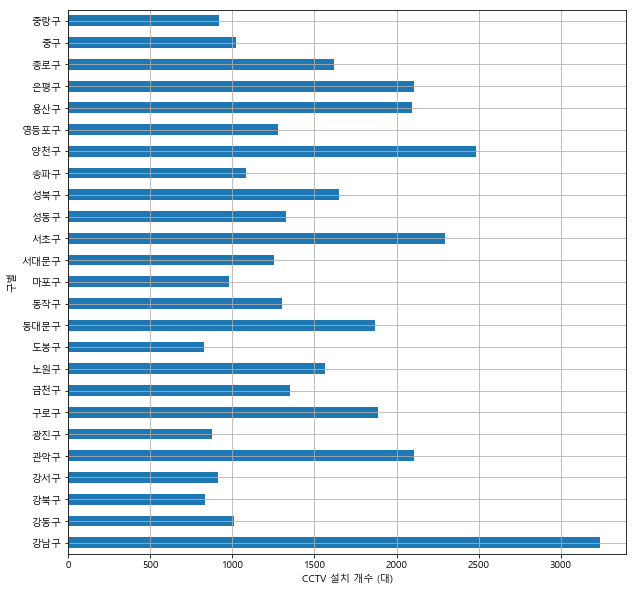

In [38]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('CCTV 설치 개수 (대)')
plt.show()

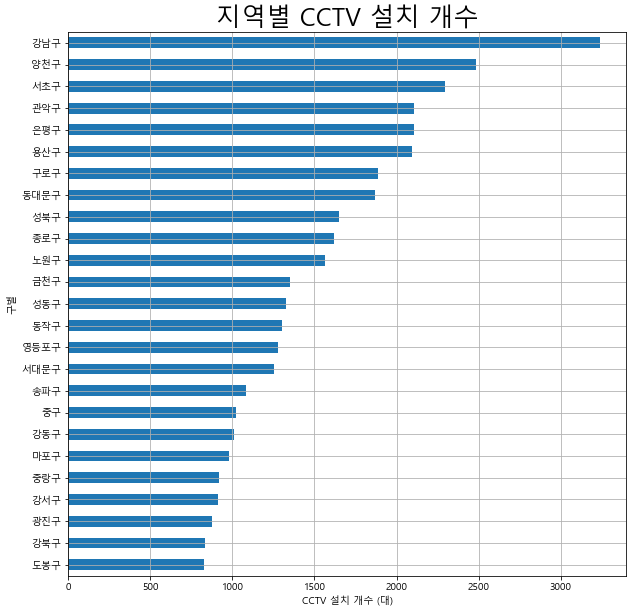

In [42]:
# 수평 바(barh) 그래프는 정렬을 시켜야한다.
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('CCTV 설치 개수 (대)')
plt.title('지역별 CCTV 설치 개수', fontsize=25)
plt.show()

CCTV 설치 개수는 '강남구'가 많다.

인구대비 CCTV 비율을 계산하고 정렬해서 시각화

Text(0.5, 1.0, '지역별 인구 당 CCTV설치 비율')

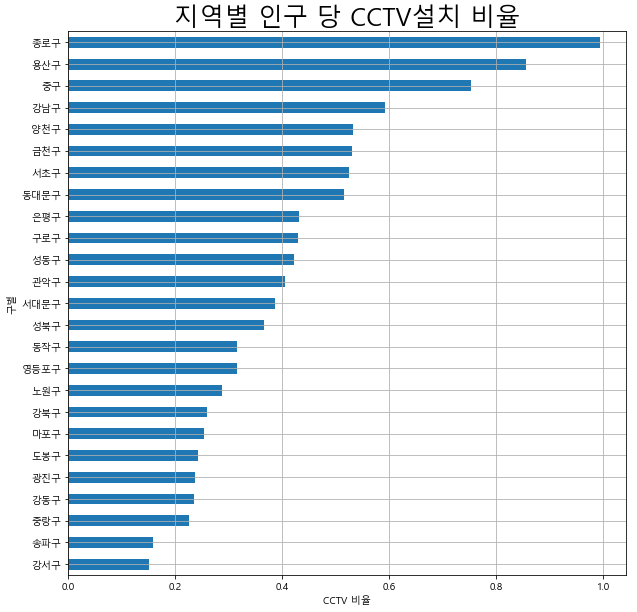

In [43]:
data_result['cctv비율']=data_result['소계']/data_result['인구수'] *100
data_result['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('CCTV 비율')
plt.title('지역별 인구 당 CCTV설치 비율', fontsize=25)

인구대비 CCTV 수를 보니 종로구와 용산구, 중구가 높다.

송파구는 CCTV 개수는 많지만 CCTV 비율이 낮다.

### Scatter함수를 사용하여 데이터 시각화

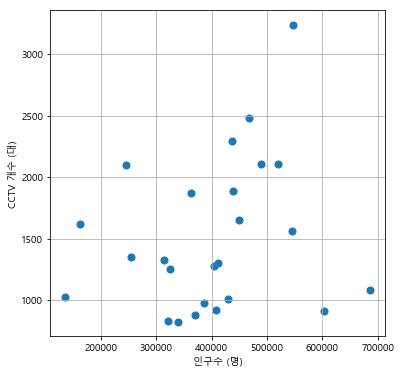

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) #s: scatter그래프의 marker크기
plt.xlabel('인구수 (명)')
plt.ylabel('CCTV 개수 (대)')
plt.grid()
plt.show()

##### 데이터를 대표하는 직선 그리기


CCTV와 인구수는 양의상관 관계를 갖는다.

In [48]:
# 가지고 있는 데이터를 기반으로 다항식을 만든다. 옵션 => x, y ,deg(최고차수)
# 갖고 있는 데이터 data_result에서 인구수와 소계를 1차방정식으로 나타냄.
fp1= np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.04688835e-03, 1.09426238e+03])

In [50]:
f1=np.poly1d(fp1) #1차원 다항식 클래스-> 그림으로 나타냄.
fx=np.linspace(100000, 700000,100) # 그래프 범위 (x축: 최소:100000, 최대:700000, 간격:100)

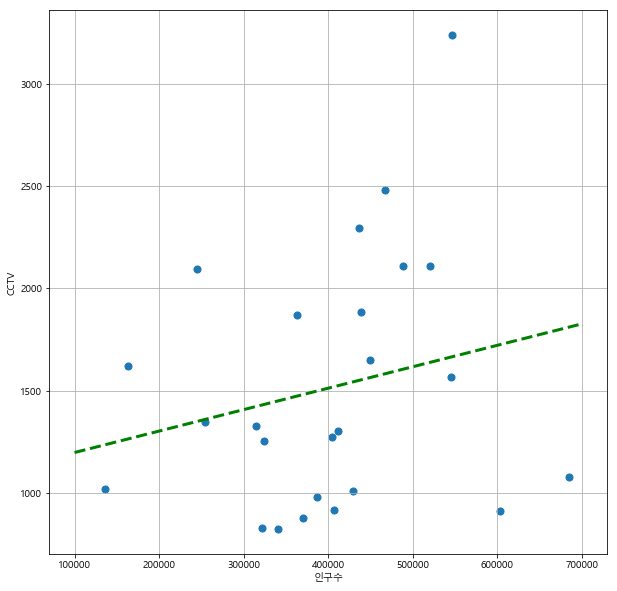

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # x축값, y축값
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()


#####  직선에서 멀어질 수록 다른색을 나타내보기

오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬하기.

In [53]:
fp1= np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1=np.poly1d(fp1)
fx=np.linspace(100000, 700000, 100)

data_result['오차']= np.abs(data_result['소계']-f1(data_result['인구수']))

df_sort=data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303,0.592091,1571.220548
양천구,2482,34.671731,466622,462599,4023,58930,0.862154,12.629066,0.531908,899.236479
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287,0.151107,814.416716
서초구,2297,63.371266,437007,432762,4245,55366,0.971380,12.669362,0.525621,745.240078
용산구,2096,53.216374,245139,229168,15971,38049,6.515079,15.521398,0.855025,745.104452


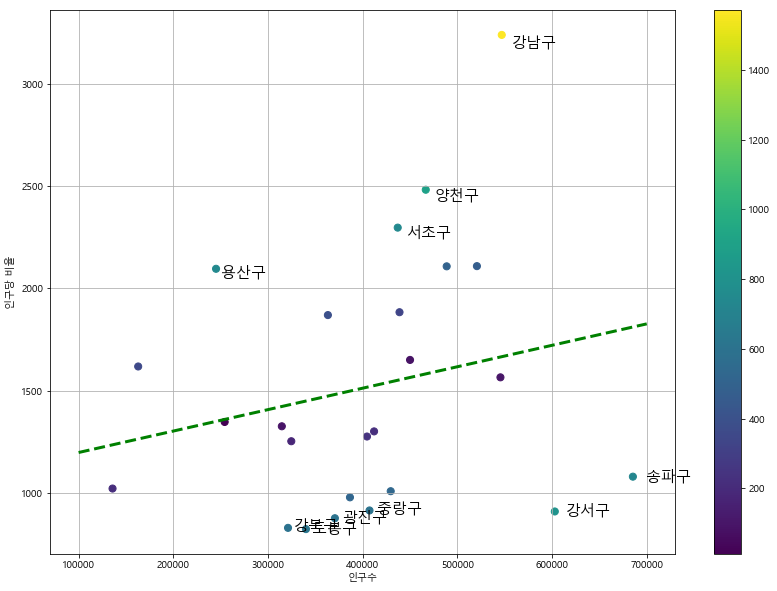

In [54]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s=50)

plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show()